<IPython.core.display.Javascript object>


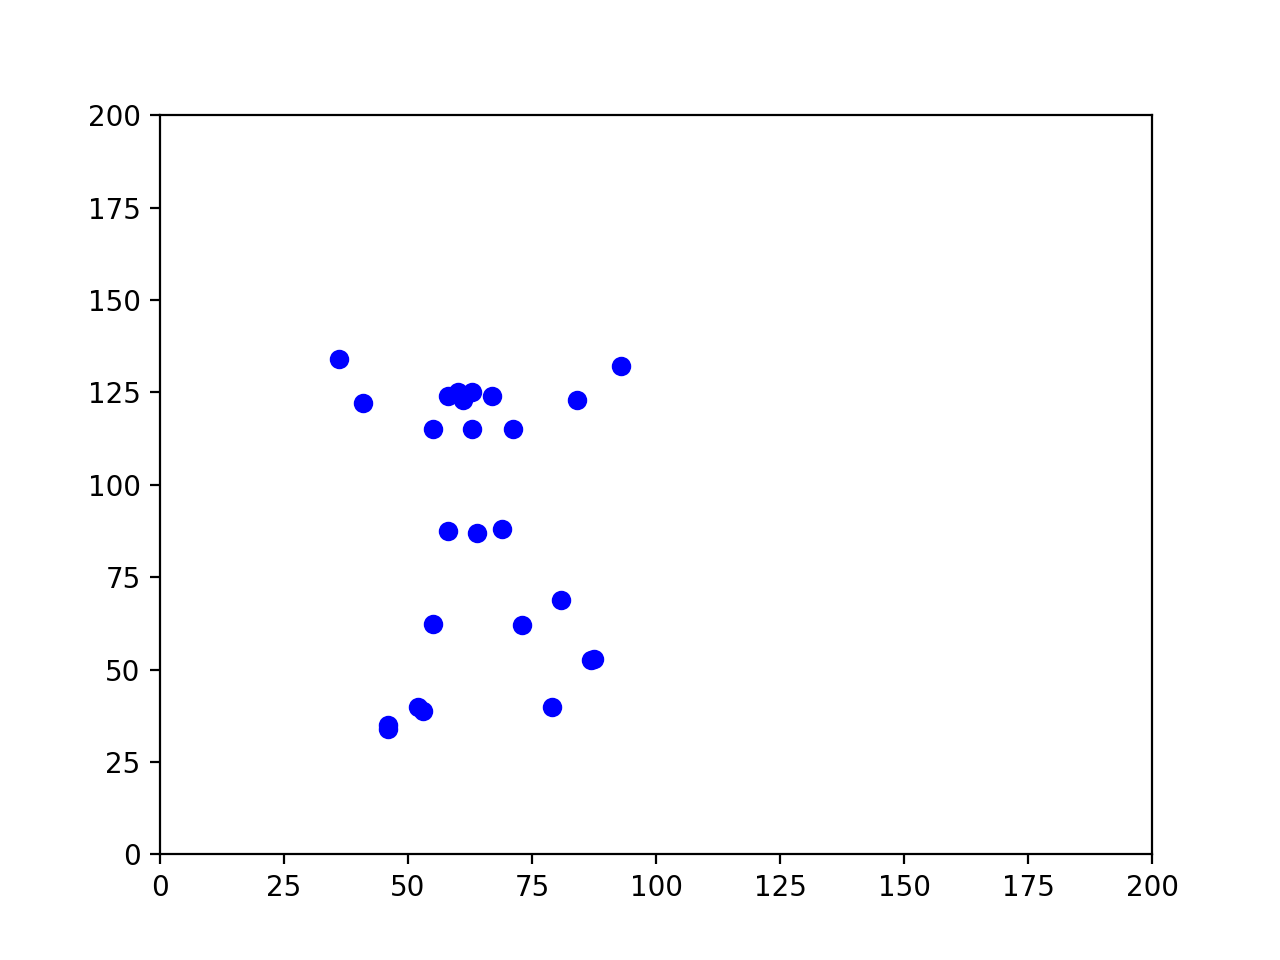

In [33]:
%matplotlib notebook
import csv
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def extract_even_odd_columns_without_pandas(csv_file, row_index):
    even_values = []
    odd_values = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)
        
        # Skip headers if present
        headers = next(csv_reader, None)
        
        for i, row in enumerate(csv_reader):
            if i == row_index:
                for j, value in enumerate(row):
                    if j % 2 == 0:
                        even_values.append(float(value))
                    else:
                        odd_values.append(150-float(value))
                break

    return even_values, odd_values

def plot_values(x_values, y_values):
    plt.scatter(x_values, y_values, color='b')

    plt.xlim(0, 200)  # Set x-axis limits
    plt.ylim(0, 200)  # Set y-axis limits

    plt.show()

csv_file_path = 'same_size_csvs/I_m01_s01_e5.csv'    
    
with open(csv_file_path, 'r') as file:
    num_rows = sum(1 for line in file) - 1  # Subtract 1 for header row

# Function to update the plot for each animation frame
def update(frame):
    plt.clf()  # Clear the current figure
    even_values, odd_values = extract_even_odd_columns_without_pandas(csv_file_path, frame)
    plot_values(even_values, odd_values)

# Create the animation
fig = plt.figure()
animation = FuncAnimation(fig, update, frames=num_rows, interval=100, repeat=False)
#animation.save('animated_scatter.mp4', writer='ffmpeg', fps=10)

plt.show()